In [1]:
import pandas as pd
data = pd.read_csv(r"..\data\clean\merged_df.csv")
data.head(2)

,video_id,title,publishedat,channelid,channeltitle,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category,title_cl
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,2020-08-12,"['brawadis', 'prank', 'basketball', 'skits', '...",1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,0,0,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs,asked
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,2020-08-12,"['apex legends', 'apex legends characters', 'n...",2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,0,0,"While running her own modding shop, Ramya Pare...",Gaming,apex legends stories outlands


In [2]:
import sklearn
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['category_encoded'] = label_encoder.fit_transform(data['category'])

# Ensure that the data types are appropriate for modeling
data['category_encoded'] = data['category_encoded'].astype(int)

# Drop the original 'category' column if not required for analysis
data.drop('category', axis=1, inplace=True)


In [3]:
data.head()

,video_id,title,publishedat,channelid,channeltitle,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,title_cl,category_encoded
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,2020-08-12,"['brawadis', 'prank', 'basketball', 'skits', '...",1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,0,0,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,asked,10
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,2020-08-12,"['apex legends', 'apex legends characters', 'n...",2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,0,0,"While running her own modding shop, Ramya Pare...",apex legends stories outlands,5
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,2020-08-12,"['jacksepticeye', 'funny', 'funny meme', 'meme...",2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,0,0,I left youtube for a month and this is what ha...,left youtube month,3
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11,UCbg_UMjlHJg_19SZckaKajg,XXL,2020-08-12,"['xxl freshman', 'xxl freshmen', '2020 xxl fre...",496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,0,0,Subscribe to XXL → http://bit.ly/subscribe-xxl...,xxl freshman class revealed official announcement,7
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,2020-08-12,"['the labrant family', 'diy', 'interior design...",1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,0,0,Transforming The LaBrant Family's empty white ...,ultimate diy home movie theater labrant,6


In [4]:

# Assuming you have a DataFrame named 'data' containing the 'publishedat' and 'trending_date' columns
data['publishedat'] = pd.to_datetime(data['publishedat'])
data['trending_date'] = pd.to_datetime(data['trending_date'])

# Calculate the time since publication in days
data['time_since_publication_days'] = (data['trending_date'] - data['publishedat']).dt.days

# Print the updated DataFrame
display(data[['publishedat', 'trending_date', 'time_since_publication_days']])


,publishedat,trending_date,time_since_publication_days
0,2020-08-11,2020-08-12,1
1,2020-08-11,2020-08-12,1
2,2020-08-11,2020-08-12,1
3,2020-08-11,2020-08-12,1
4,2020-08-11,2020-08-12,1
...,...,...,...
229764,2023-10-18,2023-10-25,7
229765,2023-10-19,2023-10-25,6
229766,2023-10-17,2023-10-25,8
229767,2023-10-19,2023-10-25,6


In [5]:
data

,video_id,title,publishedat,channelid,channeltitle,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,title_cl,category_encoded,time_since_publication_days
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,2020-08-12,"['brawadis', 'prank', 'basketball', 'skits', '...",1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,0,0,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,asked,10,1
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,2020-08-12,"['apex legends', 'apex legends characters', 'n...",2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,0,0,"While running her own modding shop, Ramya Pare...",apex legends stories outlands,5,1
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,2020-08-12,"['jacksepticeye', 'funny', 'funny meme', 'meme...",2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,0,0,I left youtube for a month and this is what ha...,left youtube month,3,1
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11,UCbg_UMjlHJg_19SZckaKajg,XXL,2020-08-12,"['xxl freshman', 'xxl freshmen', '2020 xxl fre...",496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,0,0,Subscribe to XXL → http://bit.ly/subscribe-xxl...,xxl freshman class revealed official announcement,7,1
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,2020-08-12,"['the labrant family', 'diy', 'interior design...",1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,0,0,Transforming The LaBrant Family's empty white ...,ultimate diy home movie theater labrant,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229764,vznSu-BHyVA,The Yngwie Malmsteen Interview,2023-10-18,UCJquYOG5EL82sKTfH9aMA9Q,Rick Beato,2023-10-25,"['rick beato', 'everything music', 'rick', 'be...",1081269,48626,0,6425,https://i.ytimg.com/vi/vznSu-BHyVA/default.jpg,0,0,"In this episode, shred guitar innovator Yngwie...",yngwie malmsteen interview,7,7
229765,kbzx5bcXMhA,Iso All Abilities Explained | VALORANT New Agent,2023-10-19,UCrfyyS0SKv_HAeP7v9qkFYA,Kanga - VALORANT,2023-10-25,"['iso all abilities explained', 'valorant new ...",538453,13612,0,1724,https://i.ytimg.com/vi/kbzx5bcXMhA/default.jpg,0,0,Check out my Twitch: https://www.twitch.tv/kan...,iso abilities explained valorant new agent,5,6
229766,iWT0kl1k32M,I Tried Food From Every State In America,2023-10-17,UChBEbMKI1eCcejTtmI32UEw,Joshua Weissman,2023-10-25,"['sat bawl pro', 'joshua weissman', 'american ...",2991423,98783,0,18638,https://i.ytimg.com/vi/iWT0kl1k32M/default.jpg,0,0,Get the NEW COOKBOOK: https://bit.ly/TextureOv...,tried food every state america,6,8
229767,cKOG3BlS9To,Attention: This Party Animals Video,2023-10-19,UC-gW4TeZAlKm7UATp24JsWQ,SMii7Yplus,2023-10-25,"['smii7y', 'smii7yplus', 'smii7y+', 'smii7y pl...",1542359,71166,0,1503,https://i.ytimg.com/vi/cKOG3BlS9To/default.jpg,0,0,No animals were harmed in the making of this v...,party animals video,5,6


In [6]:
# Assuming your DataFrame is named 'data'
# Convert 'trending_date' to datetime if it's not already in the right format

#data['trending_date'] = pd.to_datetime(data['trending_date'])  delete after testing


# Function to clean non-numeric characters
def clean_numeric(x):
    if isinstance(x, str):
        return ''.join(c for c in x if c.isdigit() or c in ['.', '-'])
    return x

# Clean non-numeric characters in 'view_count', 'likes', and 'dislikes' columns
data['view_count'] = data['view_count'].apply(clean_numeric)
data['likes'] = data['likes'].apply(clean_numeric)
data['dislikes'] = data['dislikes'].apply(clean_numeric)

# Convert the cleaned columns to numeric values
data['view_count'] = pd.to_numeric(data['view_count'], errors='coerce')
data['likes'] = pd.to_numeric(data['likes'], errors='coerce')
data['dislikes'] = pd.to_numeric(data['dislikes'], errors='coerce')

# Drop rows with NaN values
data.dropna(subset=['view_count', 'likes', 'dislikes'], inplace=True)


In [7]:
trend_data = data.groupby('time_since_publication_days')[['view_count','likes', 'dislikes']].mean()
trend_data


,view_count,likes,dislikes
time_since_publication_days,,,
0,1.523730e+06,1.724953e+05,2071.701843
1,1.404932e+06,9.599229e+04,810.836899
2,1.584407e+06,9.232639e+04,816.507408
3,1.829989e+06,9.971040e+04,926.848678
4,2.080311e+06,1.069939e+05,1043.398510
5,2.394512e+06,1.179060e+05,1212.350259
6,2.894936e+06,1.376830e+05,1486.895819
7,3.947819e+06,1.840447e+05,2122.677231
8,5.883178e+06,2.627907e+05,3228.559258


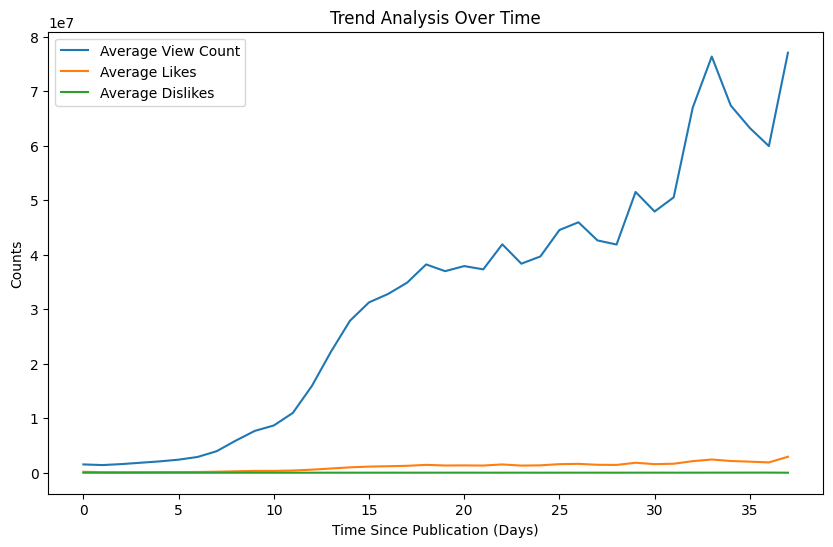

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_data, x=trend_data.index, y='view_count', label='Average View Count')
sns.lineplot(data=trend_data, x=trend_data.index, y='likes', label='Average Likes')
sns.lineplot(data=trend_data, x=trend_data.index, y='dislikes', label='Average Dislikes')
plt.xlabel('Time Since Publication (Days)')
plt.ylabel('Counts')
plt.title('Trend Analysis Over Time')
plt.legend()
plt.savefig("../images/trend_analysis_over_time.png")
plt.show()



In [9]:
df = pd.DataFrame(data, columns=['video_id','view_count', 'likes', 'dislikes', 'comment_count', 'time_since_publication_days'])


In [10]:

df

,video_id,view_count,likes,dislikes,comment_count,time_since_publication_days
0,3C66w5Z0ixs,1514614,156908,5855,35313,1
1,M9Pmf9AB4Mo,2381688,146739,2794,16549,1
2,J78aPJ3VyNs,2038853,353787,2628,40221,1
3,kXLn3HkpjaA,496771,23251,1856,7647,1
4,VIUo6yapDbc,1123889,45802,964,2196,1
...,...,...,...,...,...,...
229764,vznSu-BHyVA,1081269,48626,0,6425,7
229765,kbzx5bcXMhA,538453,13612,0,1724,6
229766,iWT0kl1k32M,2991423,98783,0,18638,8
229767,cKOG3BlS9To,1542359,71166,0,1503,6


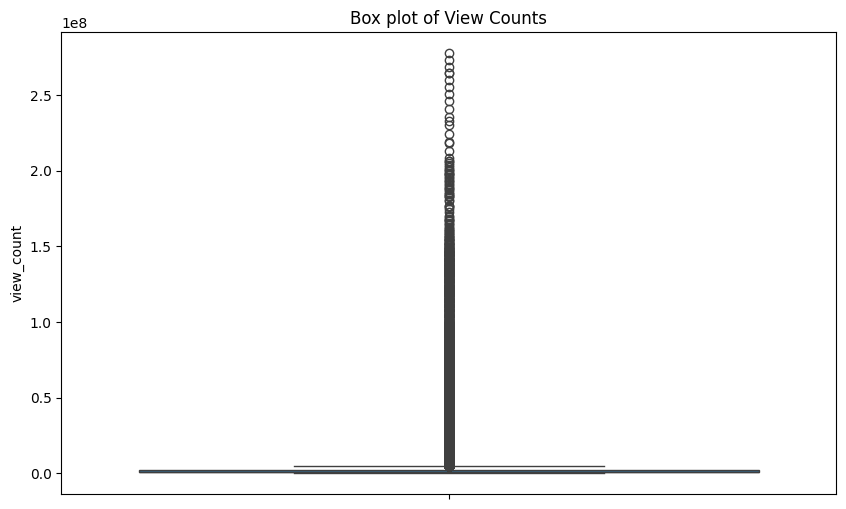

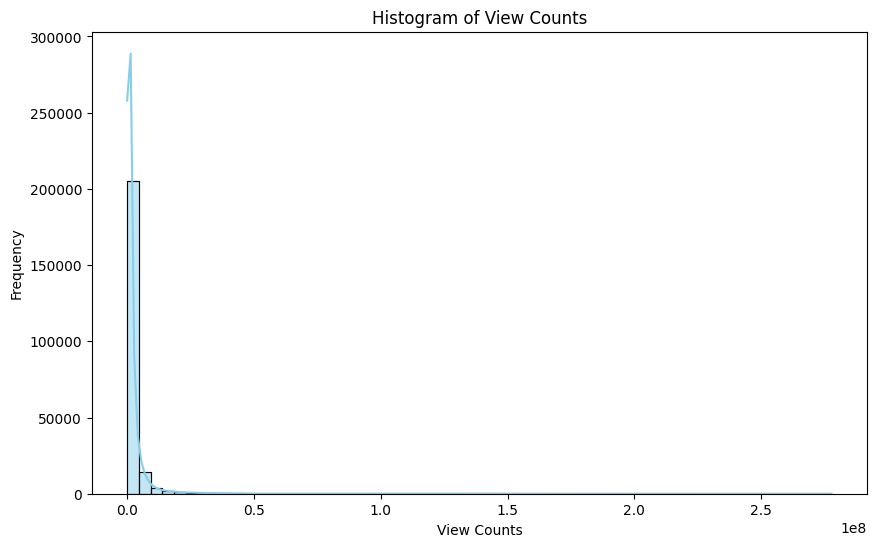

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['view_count'])
plt.title('Box plot of View Counts')
plt.show()

# Create a histogram to visualize the distribution of views
plt.figure(figsize=(10, 6))
sns.histplot(df['view_count'], kde=True, bins=60, color='skyblue')
plt.title('Histogram of View Counts')
plt.xlabel('View Counts')
plt.ylabel('Frequency')
plt.savefig("../images/distribution_of_views.png")
plt.show()

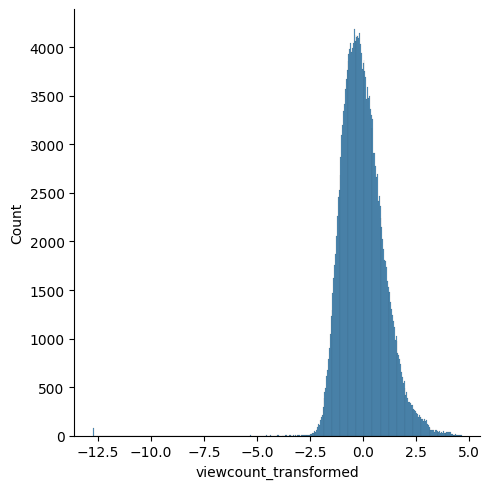

In [12]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer() # Yeo-Johnson. Box-Cox (can only be applied if all the values are positive)
pt.fit(data[['view_count']])
data['viewcount_transformed'] = pt.transform(data[['view_count']])
sns.displot(data['viewcount_transformed'])
plt.savefig("../images/distribution_of_views_after_trans.png")
plt.show()

In [13]:
data

,video_id,title,publishedat,channelid,channeltitle,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,title_cl,category_encoded,time_since_publication_days,viewcount_transformed
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,2020-08-12,"['brawadis', 'prank', 'basketball', 'skits', '...",1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,0,0,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,asked,10,1,0.298170
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,2020-08-12,"['apex legends', 'apex legends characters', 'n...",2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,0,0,"While running her own modding shop, Ramya Pare...",apex legends stories outlands,5,1,0.685290
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,2020-08-12,"['jacksepticeye', 'funny', 'funny meme', 'meme...",2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,0,0,I left youtube for a month and this is what ha...,left youtube month,3,1,0.552554
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11,UCbg_UMjlHJg_19SZckaKajg,XXL,2020-08-12,"['xxl freshman', 'xxl freshmen', '2020 xxl fre...",496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,0,0,Subscribe to XXL → http://bit.ly/subscribe-xxl...,xxl freshman class revealed official announcement,7,1,-0.662300
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,2020-08-12,"['the labrant family', 'diy', 'interior design...",1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,0,0,Transforming The LaBrant Family's empty white ...,ultimate diy home movie theater labrant,6,1,0.042094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229764,vznSu-BHyVA,The Yngwie Malmsteen Interview,2023-10-18,UCJquYOG5EL82sKTfH9aMA9Q,Rick Beato,2023-10-25,"['rick beato', 'everything music', 'rick', 'be...",1081269,48626,0,6425,https://i.ytimg.com/vi/vznSu-BHyVA/default.jpg,0,0,"In this episode, shred guitar innovator Yngwie...",yngwie malmsteen interview,7,7,0.008861
229765,kbzx5bcXMhA,Iso All Abilities Explained | VALORANT New Agent,2023-10-19,UCrfyyS0SKv_HAeP7v9qkFYA,Kanga - VALORANT,2023-10-25,"['iso all abilities explained', 'valorant new ...",538453,13612,0,1724,https://i.ytimg.com/vi/kbzx5bcXMhA/default.jpg,0,0,Check out my Twitch: https://www.twitch.tv/kan...,iso abilities explained valorant new agent,5,6,-0.592543
229766,iWT0kl1k32M,I Tried Food From Every State In America,2023-10-17,UChBEbMKI1eCcejTtmI32UEw,Joshua Weissman,2023-10-25,"['sat bawl pro', 'joshua weissman', 'american ...",2991423,98783,0,18638,https://i.ytimg.com/vi/iWT0kl1k32M/default.jpg,0,0,Get the NEW COOKBOOK: https://bit.ly/TextureOv...,tried food every state america,6,8,0.879607
229767,cKOG3BlS9To,Attention: This Party Animals Video,2023-10-19,UC-gW4TeZAlKm7UATp24JsWQ,SMii7Yplus,2023-10-25,"['smii7y', 'smii7yplus', 'smii7y+', 'smii7y pl...",1542359,71166,0,1503,https://i.ytimg.com/vi/cKOG3BlS9To/default.jpg,0,0,No animals were harmed in the making of this v...,party animals video,5,6,0.313726


In the first attempt models were applied on transformed viewcount column but its not possible to predict future views based on this.

In [14]:
#linear model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


X = data[[ 'likes', 'dislikes', 'comment_count','time_since_publication_days']]
y = data['viewcount_transformed']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict the target variable
y_pred = model.predict(X_test)

# Model evaluation
print('Coefficients:', model.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Coefficients: [ 1.35955318e-06  8.69529221e-06 -2.80439952e-06  8.50894453e-02]
Mean squared error: 0.70
Coefficient of determination: 0.30


The above output shows that given model is not suitable for prediction because high mean squared error.
Next we apply Random Forest Regressor

In [16]:

from sklearn.ensemble import RandomForestRegressor

X = data[[ 'likes', 'dislikes', 'comment_count','time_since_publication_days']]
y = data['viewcount_transformed'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Random Forest Regressor model
rr_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model
rr_model.fit(X_train, y_train)

# Predict the target variable
y_pred = rr_model.predict(X_test)

# Model evaluation
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 0.29
Coefficient of determination: 0.71


The above output shows that given model is not suitable for prediction because high mean squared error.
Next we apply Decision Tree

In [17]:

from sklearn.tree import DecisionTreeRegressor


X = data[[ 'likes', 'dislikes', 'comment_count','time_since_publication_days']]
y = data['viewcount_transformed'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=0)

# Fit the model
model.fit(X_train, y_train)

# Predict the target variable
y_pred = model.predict(X_test)

# Model evaluation
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 0.50
Coefficient of determination: 0.50


The above output shows that given model is not suitable for prediction because high mean squared error.
so we make predictions using Random regressor as the MSE is least.

In [19]:
# Example data for a content creator
likes = 45802
dislikes = 962
comment_count = 2196
time_since_publication_days = 1
viewcount = 1123889
new_data = {'likes': likes, 'dislikes': dislikes, 'comment_count': comment_count, 'time_since_publication_days': time_since_publication_days}


# Using the trained model for prediction
predicted_transformed_viewcount = rr_model.predict([[new_data['likes'], new_data['dislikes'], new_data['comment_count'], new_data['time_since_publication_days']]])
print(predicted_transformed_viewcount)
# Reshape the predicted transformed view count to a 2D array
predicted_transformed_viewcount_2d = predicted_transformed_viewcount.reshape(-1, 1)
print(predicted_transformed_viewcount_2d)
predicted_viewcount = pt.inverse_transform(predicted_transformed_viewcount_2d)
# Display the predicted view count
final_prediction = viewcount + predicted_viewcount[0][0]
print('Predicted View Count:', final_prediction)


[-0.04229273]
[[-0.04229273]]
Predicted View Count: 2142719.815907439


C:\Users\Megha\Desktop\Ironhack\Week_9\Final_project\youtube_engagement_analysis\env_youtube_engagement_analysis\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Megha\Desktop\Ironhack\Week_9\Final_project\youtube_engagement_analysis\env_youtube_engagement_analysis\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [20]:
# Example data for a content creator
likes = 23251
dislikes = 1856
comment_count = 7647
time_since_publication_days = 1
viewcount = 496771
new_data = {'likes': likes, 'dislikes': dislikes, 'comment_count': comment_count, 'time_since_publication_days': time_since_publication_days}


# Using the trained model for prediction
predicted_transformed_viewcount = rr_model.predict([[new_data['likes'], new_data['dislikes'], new_data['comment_count'], new_data['time_since_publication_days']]])
print(predicted_transformed_viewcount)
# Reshape the predicted transformed view count to a 2D array
predicted_transformed_viewcount_2d = predicted_transformed_viewcount.reshape(-1, 1)
print(predicted_transformed_viewcount_2d)
predicted_viewcount = pt.inverse_transform(predicted_transformed_viewcount_2d)
# Display the predicted view count
final_prediction = viewcount + predicted_viewcount[0][0]
print('Predicted View Count:', final_prediction)


[-0.51325514]
[[-0.51325514]]
Predicted View Count: 1086908.29081112


C:\Users\Megha\Desktop\Ironhack\Week_9\Final_project\youtube_engagement_analysis\env_youtube_engagement_analysis\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Megha\Desktop\Ironhack\Week_9\Final_project\youtube_engagement_analysis\env_youtube_engagement_analysis\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


This does not take into account time in calculating view count and as we have seen above viewcount depends on time, so we will add a view count velocity rate to dataframe and do modelling again.

calculating view count velocity

In [21]:
df = data[[ 'likes', 'dislikes', 'comment_count','time_since_publication_days','view_count']] 

In [22]:
import numpy as np
df_2= df.copy()
df_2['view_velocity'] = np.log(df_2['view_count'] + 1) / (df_2['time_since_publication_days'] + 1)


In [23]:
df_2

,likes,dislikes,comment_count,time_since_publication_days,view_count,view_velocity
0,156908,5855,35313,1,1514614,7.115336
1,146739,2794,16549,1,2381688,7.341660
2,353787,2628,40221,1,2038853,7.263949
3,23251,1856,7647,1,496771,6.557943
4,45802,964,2196,1,1123889,6.966153
...,...,...,...,...,...,...
229764,48626,0,6425,7,1081269,1.736706
229765,13612,0,1724,6,538453,1.885208
229766,98783,0,18638,8,2991423,1.656807
229767,71166,0,1503,6,1542359,2.035546


linear model

In [24]:
X = df_2[[ 'likes', 'dislikes', 'comment_count','time_since_publication_days' , 'view_count']]
y = df_2['view_velocity']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model
model_lr = LinearRegression()

# Fit the model
model_lr.fit(X_train, y_train)

# Predict the target variable
y_pred = model_lr.predict(X_test)

# Model evaluation
print('Coefficients:', model_lr.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Coefficients: [-5.46684009e-08 -2.25363747e-06 -8.53067905e-07 -5.59946039e-01
  5.01329836e-08]
Mean squared error: 1.10
Coefficient of determination: 0.59


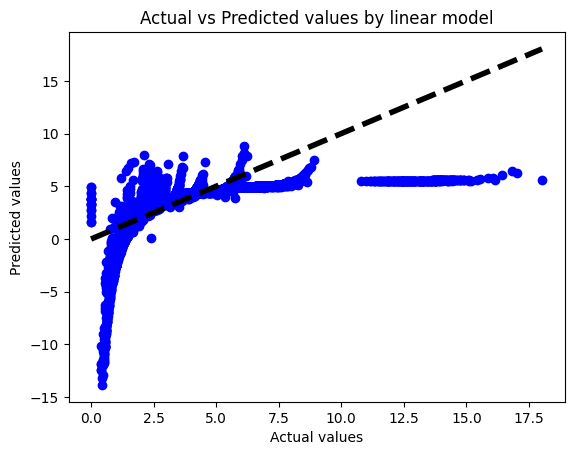

In [25]:
# Plotting the predicted values against the actual values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values by linear model')
plt.savefig("../images/model_linear.png")
plt.show()


v high error

In [26]:
X = df_2[[ 'likes', 'dislikes', 'comment_count','time_since_publication_days' , 'view_count']]
y = df_2['view_velocity']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Decision Tree Regressor model
model_dt = DecisionTreeRegressor(random_state=0)

# Fit the model
model_dt.fit(X_train, y_train)

# Predict the target variable
y_pred = model_dt.predict(X_test)

# Model evaluation
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 0.00
Coefficient of determination: 1.00


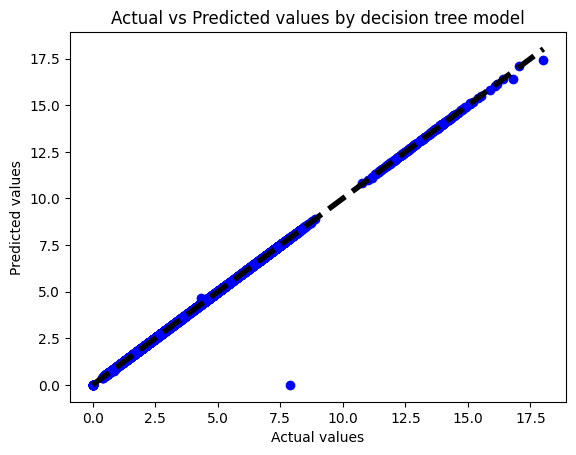

In [27]:
# Plotting the predicted values against the actual values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values by decision tree model')
plt.savefig("../images/model_decision_tree.png")
plt.show()


this suggests perfect fit, as indicated by a zero MSE and an R-squared value of 1.00, could be a sign of overfittin

In [28]:
X = df_2[[ 'likes', 'dislikes', 'comment_count','time_since_publication_days' , 'view_count']]
y = df_2['view_velocity']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Random Forest Regressor model
rr_model1 = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model
rr_model1.fit(X_train, y_train)

# Predict the target variable
y_pred = rr_model1.predict(X_test)

# Model evaluation
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.00
Coefficient of determination: 1.00


Coefficient of Determination (R-squared): It represents the proportion of the variance in the dependent variable that is predictable from the independent variables. An R-squared value of 1.00 signifies that the model explains all the variability of the response data around its mean.

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

X = df_2[['likes', 'dislikes', 'comment_count', 'time_since_publication_days', 'view_count']]
y = df_2['view_velocity']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Create and fit the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as per your choice
knn_model.fit(X_train, y_train)

# Predict the target variable
y_pred = knn_model.predict(X_test)

# Evaluate the model
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 0.03
Coefficient of determination: 0.99


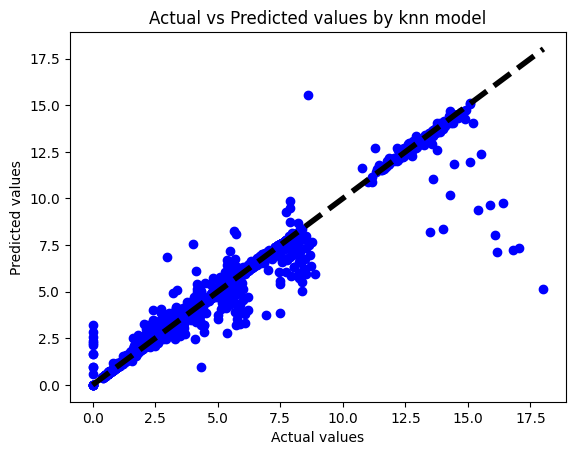

In [31]:
# Plotting the predicted values against the actual values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values by knn model')
plt.savefig("../images/model_knn.png")
plt.show()


overall function to predict view count

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
X = df_2[[ 'likes', 'dislikes', 'comment_count','time_since_publication_days' , 'view_count']]
y = df_2['view_velocity']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Random Forest Regressor model
rr_model_view_count = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model
rr_model_view_count.fit(X_train, y_train)

# Predict the target variable
y_pred = rr_model_view_count.predict(X_test)

# Model evaluation
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.00
Coefficient of determination: 1.00


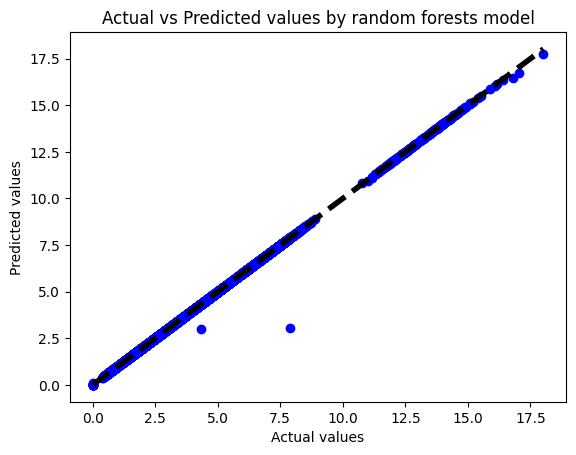

In [33]:
# Plotting the predicted values against the actual values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values by random forests model')
plt.savefig("../images/model_random_forest.png")
plt.show()


In [35]:
#copy
x= input("Do you want to predict your view count, give answer in y or n?")

if x.lower() == 'y':
    likes = int(input("Number of likes in the uploaded video:"))
    dislikes = int(input("Number of dislikes in the uploaded video:"))
    comment_count = int(input ("Count of comments in the uploaded video:"))
    time_since_publication_days = int(input ("Time_since_publication_days in days"))
    viewcount = int(input("Enter the Viewcount"))
    time_period_days = int(input("Enter time period in days"))
    
    new_data = {'likes': likes, 'dislikes': dislikes, 'comment_count': comment_count, 'time_since_publication_days': time_since_publication_days, 'view_count': viewcount}
    new_data_df = pd.DataFrame([new_data])
    display(new_data_df)
    
# Use the trained model to make predictions
    predicted_view_velocity = rr_model_view_count.predict(new_data_df)

# Display the predicted view count velocity
    print('Predicted View Velocity:', predicted_view_velocity)

    time_period_days = 1095
    
# transform predicted velocity back to non log
    #predicted_view_velocity_transformed = np.exp(predicted_view_velocity * (time_since_publication_days + 1)) - 1
    #print('Predicted View Velocity transformed:', predicted_view_velocity_transformed)
    predicted_view_count = viewcount + predicted_view_velocity * time_period_days

    #predicted_view_count = initial_view_count + predicted_view_velocity_transformed * time_period_days
#predicted_view_count = initial_view_count + 187314 * time_period_days

# Display the predicted view count
    print('Predicted View Count in X days:', predicted_view_count)
   
else : 
    print("Thank you")

Do you want to predict your view count, give answer in y or n? y
Number of likes in the uploaded video: 20
Number of dislikes in the uploaded video: 2
Count of comments in the uploaded video: 12
Time_since_publication_days in days 90
Enter the Viewcount 700
Enter time period in days 6


,likes,dislikes,comment_count,time_since_publication_days,view_count
0,20,2,12,90,700


Predicted View Velocity: [0.3714359]
Predicted View Count in X days: [1106.72231113]


In [37]:
x= input("Do you want to predict your view count, give answer in y or n?")
if x.lower() == 'y':
    likes = 45802
    dislikes = 962
    comment_count = 2196
    time_since_publication_days = 1
    viewcount = 1123889
    
    new_data = {'likes': likes, 'dislikes': dislikes, 'comment_count': comment_count, 'time_since_publication_days': time_since_publication_days, 'view_count': viewcount}
    new_data_df = pd.DataFrame([new_data])
    display(new_data_df)
    
# Use the trained model to make predictions
    predicted_view_velocity = rr_model_view_count.predict(new_data_df)
   # predicted_view_velocity = 6.966153
# Display the predicted view count velocity
    print('Predicted View Velocity:', predicted_view_velocity)

    time_period_days = 1095
    
# transform predicted velocity back to non log
    #predicted_view_velocity_transformed = np.exp(predicted_view_velocity * (time_since_publication_days + 1)) - 1
    #print('Predicted View Velocity transformed:', predicted_view_velocity_transformed)
    predicted_view_count = 1123889 + predicted_view_velocity * time_period_days

    #predicted_view_count = initial_view_count + predicted_view_velocity_transformed * time_period_days
#predicted_view_count = initial_view_count + 187314 * time_period_days

# Display the predicted view count
    print('Predicted View Count in X days:', predicted_view_count)
   
else : 
    print("Thank you")

Do you want to predict your view count, give answer in y or n? y


,likes,dislikes,comment_count,time_since_publication_days,view_count
0,45802,962,2196,1,1123889


Predicted View Velocity: [6.96618764]
Predicted View Count in X days: [1131516.97546756]


In [38]:
import pickle
path = "./"
model_file_name = "rr_model_view_count.pkl"

with open(path + model_file_name, "wb") as file:
    pickle.dump(rr_model_view_count, file)